## SCALABLE DATABASE PHASE 2 TO PREDICT THE DELAYED FLIGHTS
Niyati Patil

# EDA

In [ ]:
#Importing Libraries and dependencies needed for our explaination.
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix



In [ ]:
#Reading the Data
data = pd.read_csv("C:\\Users\\niyu1\\Downloads\\complete_data.csv")
data

C:\Users\niyu1\AppData\Local\Temp\ipykernel_30548\129926389.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\niyu1\\Downloads\\complete_data.csv")


,somesh_sample.year,somesh_sample.month,somesh_sample.dayofmonth,somesh_sample.dayofweek,somesh_sample.deptime,somesh_sample.crsdeptime,somesh_sample.arrtime,somesh_sample.crsarrtime,somesh_sample.uniquecarrier,somesh_sample.flightnum,...,somesh_sample.taxiout,somesh_sample.cancelled,somesh_sample.cancellationcode,somesh_sample.diverted,somesh_sample.carrierdelay,somesh_sample.weatherdelay,somesh_sample.nasdelay,somesh_sample.securitydelay,somesh_sample.lateaircraftdelay,somesh_sample.delayed
0,2002,3,29,5,1010.0,1010,1137.0,1130,US,522,...,23,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
1,2002,3,31,7,1005.0,1010,1137.0,1130,US,522,...,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
2,2002,3,3,7,817.0,805,1012.0,940,US,523,...,29,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
3,2002,3,4,1,802.0,805,950.0,940,US,523,...,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
4,2002,3,5,2,804.0,805,946.0,940,US,523,...,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2004,7,11,7,900.0,900,1117.0,1135,WN,887,...,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0,N
149996,2004,7,11,7,810.0,810,1030.0,1035,WN,1452,...,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0,N
149997,2004,7,11,7,2150.0,2130,2359.0,2345,WN,2428,...,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0,Y
149998,2004,7,11,7,2100.0,2010,2319.0,2235,WN,606,...,8,0,NaN,0,5.0,0.0,0.0,0.0,39.0,Y


In [ ]:
#Headers
headers = data.columns.tolist()

#Removing the common prefix from all column names
common_prefix = 'somesh_sample.'
cleaned_headers = [header[len(common_prefix):] if header.startswith(common_prefix) else header for header in headers]

#Assign the cleaned headers to the DataFrame
data.columns = cleaned_headers

Downloading the CSV file with cleaned headers

In [ ]:

#downloads_path = 'C:\\Users\\niyu1\\Downloads\\'
#csv_file = downloads_path + 'years150k.csv'
#data.to_csv(csv_file, index=False)


Commented the above lines of code so that it doesn't download the file twice

Reading the Dataset with cleaned headers

In [ ]:
df = pd.read_csv("C:\\Users\\niyu1\\Downloads\\years150k.csv", sep=',')
df.head(10)

C:\Users\niyu1\AppData\Local\Temp\ipykernel_30548\935366666.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\niyu1\\Downloads\\years150k.csv", sep=',')


,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,delayed
0,2002,3,29,5,1010.0,1010,1137.0,1130,US,522,...,23,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
1,2002,3,31,7,1005.0,1010,1137.0,1130,US,522,...,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
2,2002,3,3,7,817.0,805,1012.0,940,US,523,...,29,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
3,2002,3,4,1,802.0,805,950.0,940,US,523,...,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
4,2002,3,5,2,804.0,805,946.0,940,US,523,...,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
5,2002,3,6,3,800.0,805,935.0,940,US,523,...,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N
6,2002,3,7,4,809.0,805,1014.0,940,US,523,...,44,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
7,2002,3,8,5,816.0,805,948.0,940,US,523,...,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
8,2002,3,9,6,806.0,805,949.0,940,US,523,...,22,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
9,2002,3,10,7,805.0,805,938.0,940,US,523,...,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
df.tail(10)

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,delayed
149990,2004,7,11,7,1850.0,1730,2010.0,1900,WN,2028,...,10,0,NaN,0,8.0,0.0,0.0,0.0,62.0,Y
149991,2004,7,11,7,935.0,935,1047.0,1055,WN,1094,...,5,0,NaN,0,0.0,0.0,0.0,0.0,0.0,N
149992,2004,7,11,7,2020.0,2020,2342.0,2315,WN,2000,...,15,0,NaN,0,0.0,0.0,27.0,0.0,0.0,Y
149993,2004,7,11,7,1330.0,1330,1803.0,1640,WN,2437,...,85,0,NaN,0,0.0,0.0,83.0,0.0,0.0,Y
149994,2004,7,11,7,858.0,900,1155.0,1200,WN,2574,...,7,0,NaN,0,0.0,0.0,0.0,0.0,0.0,N
149995,2004,7,11,7,900.0,900,1117.0,1135,WN,887,...,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0,N
149996,2004,7,11,7,810.0,810,1030.0,1035,WN,1452,...,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0,N
149997,2004,7,11,7,2150.0,2130,2359.0,2345,WN,2428,...,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0,Y
149998,2004,7,11,7,2100.0,2010,2319.0,2235,WN,606,...,8,0,NaN,0,5.0,0.0,0.0,0.0,39.0,Y
149999,2004,7,11,7,1355.0,1355,1625.0,1640,WN,1064,...,13,0,NaN,0,0.0,0.0,0.0,0.0,0.0,N


In [ ]:
#Check for shape
df.shape

(150000, 30)

In [ ]:
#Check for Datatypes
df.dtypes

year                   int64
month                  int64
dayofmonth             int64
dayofweek              int64
deptime              float64
crsdeptime             int64
arrtime              float64
crsarrtime             int64
uniquecarrier         object
flightnum              int64
tailnum               object
actualelapsedtime    float64
crselapsedtime         int64
airtime              float64
arrdelay             float64
depdelay             float64
origin                object
dest                  object
distance               int64
taxiin                 int64
taxiout                int64
cancelled              int64
cancellationcode      object
diverted               int64
carrierdelay         float64
weatherdelay         float64
nasdelay             float64
securitydelay        float64
lateaircraftdelay    float64
delayed               object
dtype: object

In [ ]:
#Understanding the contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               150000 non-null  int64  
 1   month              150000 non-null  int64  
 2   dayofmonth         150000 non-null  int64  
 3   dayofweek          150000 non-null  int64  
 4   deptime            148656 non-null  float64
 5   crsdeptime         150000 non-null  int64  
 6   arrtime            148408 non-null  float64
 7   crsarrtime         150000 non-null  int64  
 8   uniquecarrier      150000 non-null  object 
 9   flightnum          150000 non-null  int64  
 10  tailnum            150000 non-null  object 
 11  actualelapsedtime  148408 non-null  float64
 12  crselapsedtime     150000 non-null  int64  
 13  airtime            148408 non-null  float64
 14  arrdelay           148408 non-null  float64
 15  depdelay           148656 non-null  float64
 16  or

In [ ]:
data.describe()

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,flightnum,actualelapsedtime,...,distance,taxiin,taxiout,cancelled,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
count,150000.000000,150000.000000,150000.000000,150000.000000,148656.000000,150000.000000,148408.000000,150000.000000,150000.000000,148408.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,2001.000000,4.600000,13.783467,4.071900,1350.894528,1340.625433,1501.392344,1504.563740,1115.493473,129.233808,...,780.945520,7.117373,14.221587,0.008960,0.001653,2.247917,0.477867,2.777150,0.028150,4.510433
std,3.898731,1.959598,8.866129,1.977385,481.888987,470.671165,504.345206,487.058381,1083.155719,69.592204,...,547.301983,40.384953,8.917805,0.094233,0.040628,12.404208,6.302246,11.562137,1.641606,18.530664
min,1996.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,...,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,3.000000,6.000000,2.000000,932.000000,930.000000,1117.000000,1120.000000,399.000000,77.000000,...,367.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,3.000000,12.000000,4.000000,1335.000000,1330.000000,1523.000000,1524.000000,764.000000,111.000000,...,633.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2004.000000,7.000000,21.000000,6.000000,1745.000000,1730.000000,1924.000000,1919.000000,1564.000000,159.000000,...,992.000000,7.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2006.000000,7.000000,31.000000,7.000000,2630.000000,2359.000000,2708.000000,2359.000000,4921.000000,696.000000,...,3784.000000,1450.000000,602.000000,1.000000,1.000000,780.000000,315.000000,288.000000,181.000000,428.000000


Data Wrangling and Cleaning

In [ ]:
#Checking for total null values in the database
print('Total Null Values:')
print(df.isnull().sum().sum())

Total Null Values:
608788


In [ ]:
#Checking for null values in the database
print('NaN in columns:')
print(df.isnull().sum(axis = 0))

print('NaN in rows:')
print(df.isnull().sum(axis = 1))

NaN in columns:
year                      0
month                     0
dayofmonth                0
dayofweek                 0
deptime                1344
crsdeptime                0
arrtime                1592
crsarrtime                0
uniquecarrier             0
flightnum                 0
tailnum                   0
actualelapsedtime      1592
crselapsedtime            0
airtime                1592
arrdelay               1592
depdelay               1344
origin                    0
dest                      0
distance                  0
taxiin                    0
taxiout                   0
cancelled                 0
cancellationcode     149732
diverted                  0
carrierdelay          90000
weatherdelay          90000
nasdelay              90000
securitydelay         90000
lateaircraftdelay     90000
delayed                   0
dtype: int64
NaN in rows:
0         6
1         6
2         6
3         6
4         6
         ..
149995    1
149996    1
149997    1
149998    

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = df.select_dtypes(include=numerics).columns.tolist()

#Numerical Features
correlation = df[num_features].corr()
num_features

['year',
 'month',
 'dayofmonth',
 'dayofweek',
 'deptime',
 'crsdeptime',
 'arrtime',
 'crsarrtime',
 'flightnum',
 'actualelapsedtime',
 'crselapsedtime',
 'airtime',
 'arrdelay',
 'depdelay',
 'distance',
 'taxiin',
 'taxiout',
 'cancelled',
 'diverted',
 'carrierdelay',
 'weatherdelay',
 'nasdelay',
 'securitydelay',
 'lateaircraftdelay']

Correlation Matrix

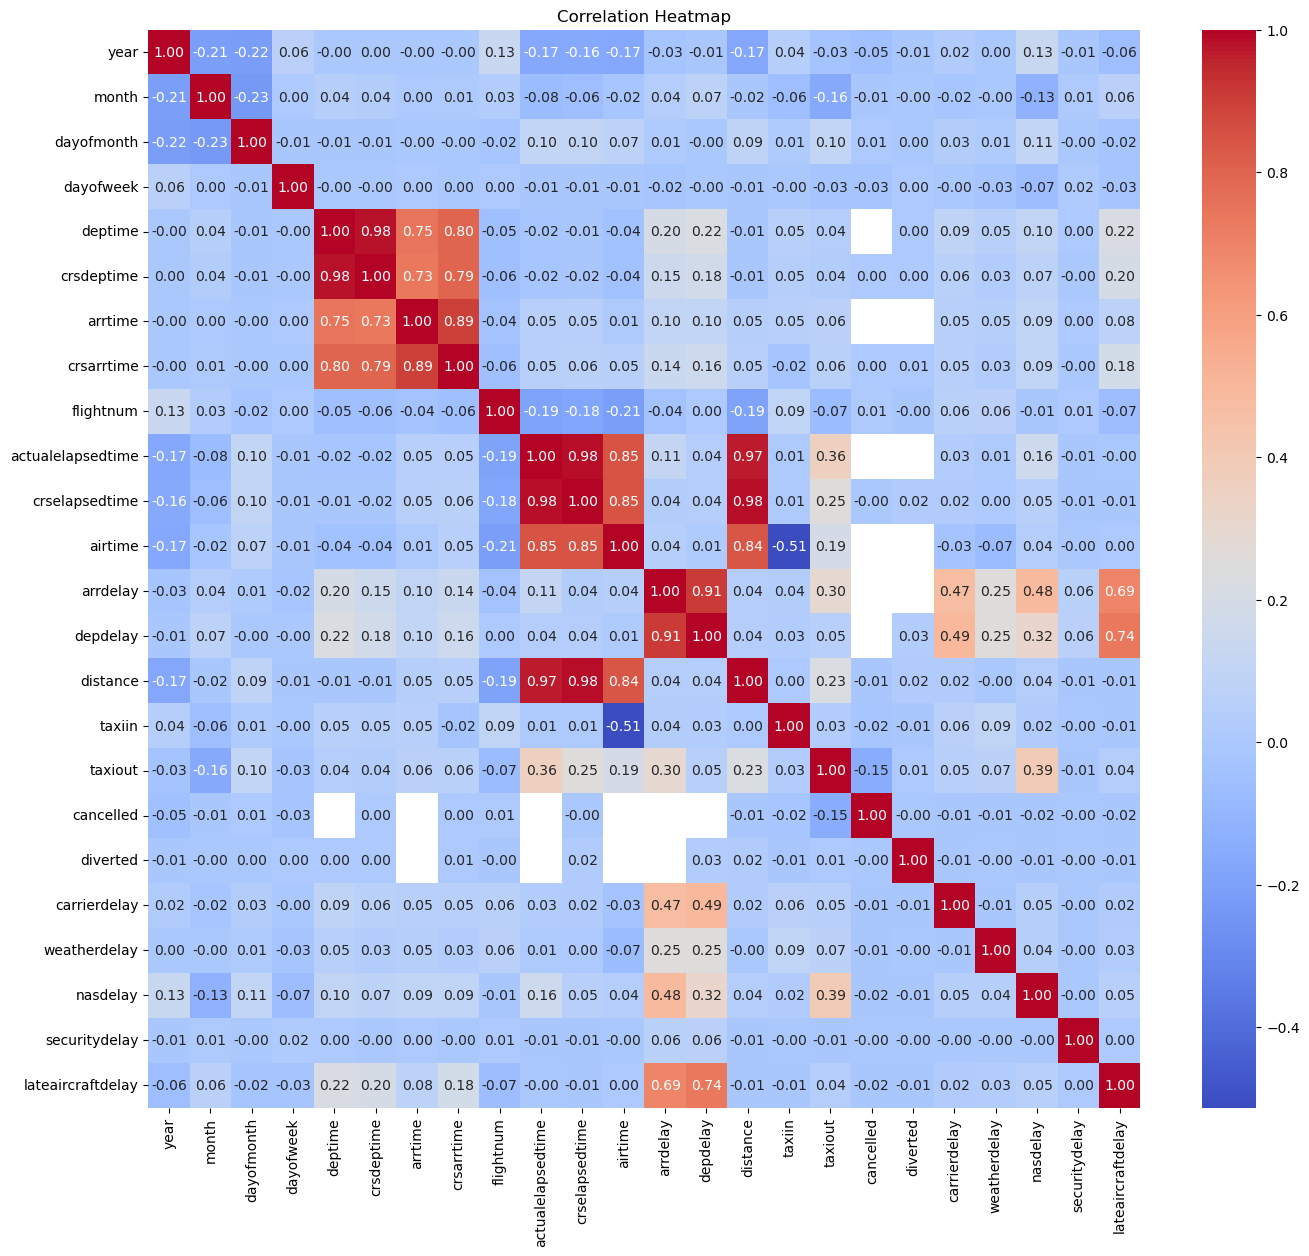

In [ ]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows relationships between various flight-related parameters like departure time, arrival time, delays, and more. For example, depdelay and arrdelay might show a strong positive correlation, indicating that when departures are delayed, arrivals tend to be delayed as well.

In [ ]:
#Selecting Numerical features
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False


num_features = correlation.columns[columns]
num_features

Index(['year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'arrtime',
       'crsarrtime', 'flightnum', 'actualelapsedtime', 'airtime', 'arrdelay',
       'taxiin', 'taxiout', 'cancelled', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

 This is done to essentially remove variables that are highly correlated with other variables from the dataset. Because highly correlated variables can lead to multicollinearity in regression models, which can make the model unstable and the estimates of the coefficients unreliable.

In [ ]:
#Selecting Categorical features
objects = ['object','category', 'bool']
cat_features = df.select_dtypes(include=objects).columns.tolist()

#Remove the target varible
cat_features.remove('delayed')

#Categorical Features
cat_features

['uniquecarrier', 'tailnum', 'origin', 'dest', 'cancellationcode']

In [ ]:
# #Preprocessing Pipelines for Numerical and Categorical features

# #Create Pipeline for preprocessing numerical features
# num_pipeline = Pipeline(steps=[
#     ('imputer',SimpleImputer(strategy="constant")),
#     ('std_scaler', StandardScaler()),
# ])

# #Categorical Features
# cat_pipeline = Pipeline(steps=[
#     ("onehot", OneHotEncoder(handle_unknown='ignore'))
# ])

# #Setup preprocessing steps (fill missing values, then convert to numbers)
# preprocessor = ColumnTransformer(transformers=[
#     ("num", num_pipeline, num_features),
#     ("cat", cat_pipeline, cat_features)
# ])

# #Setup preprocessing steps (fill missing values, then convert to numbers)
# preprocessor = ColumnTransformer(transformers=[
#     ("num", num_features),
#     ("cat", cat_features)
# ])


In [ ]:
#Create a LabelEncoder object
label_encoder = LabelEncoder()

#Apply the label encoder to each categorical feature
for column in cat_features:
    df[column] = label_encoder.fit_transform(df[column])

#Print the transformed data
print(df.head())

   year  month  dayofmonth  dayofweek  deptime  crsdeptime  arrtime  \
0  2002      3          29          5   1010.0        1010   1137.0   
1  2002      3          31          7   1005.0        1010   1137.0   
2  2002      3           3          7    817.0         805   1012.0   
3  2002      3           4          1    802.0         805    950.0   
4  2002      3           5          2    804.0         805    946.0   

   crsarrtime  uniquecarrier  flightnum  ...  taxiout  cancelled  \
0        1130             11        522  ...       23          0   
1        1130             11        522  ...       14          0   
2         940             11        523  ...       29          0   
3         940             11        523  ...       15          0   
4         940             11        523  ...       18          0   

   cancellationcode  diverted  carrierdelay  weatherdelay  nasdelay  \
0                 3         0           NaN           NaN       NaN   
1                 3   

In [ ]:
#Convert categorical data to binary '1' & '0'

def convert_to_binary(value):
    if value == 'Y':
        return 1
    elif value == 'N':
        return 0
    else:
        return None

df['delayed'] = df['delayed'].apply(convert_to_binary)

In [ ]:
#check Null values
df.isnull().sum()

year                     0
month                    0
dayofmonth               0
dayofweek                0
deptime               1344
crsdeptime               0
arrtime               1592
crsarrtime               0
uniquecarrier            0
flightnum                0
tailnum                  0
actualelapsedtime     1592
crselapsedtime           0
airtime               1592
arrdelay              1592
depdelay              1344
origin                   0
dest                     0
distance                 0
taxiin                   0
taxiout                  0
cancelled                0
cancellationcode         0
diverted                 0
carrierdelay         90000
weatherdelay         90000
nasdelay             90000
securitydelay        90000
lateaircraftdelay    90000
delayed                  0
dtype: int64

In [ ]:
#check datatypes
df.dtypes

year                   int64
month                  int64
dayofmonth             int64
dayofweek              int64
deptime              float64
crsdeptime             int64
arrtime              float64
crsarrtime             int64
uniquecarrier          int32
flightnum              int64
tailnum                int32
actualelapsedtime    float64
crselapsedtime         int64
airtime              float64
arrdelay             float64
depdelay             float64
origin                 int32
dest                   int32
distance               int64
taxiin                 int64
taxiout                int64
cancelled              int64
cancellationcode       int32
diverted               int64
carrierdelay         float64
weatherdelay         float64
nasdelay             float64
securitydelay        float64
lateaircraftdelay    float64
delayed                int64
dtype: object

In [ ]:
#Create list of numerical columns and fill missing values
numerical_cols = ['deptime', 'arrtime', 'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay', 'depdelay']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

#Droping columns with a large number of missing values
df.drop(columns=['carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay','cancellationcode'],inplace=True)

#To Check if there are any remaining missing values
print(df.isnull().sum())

year                 0
month                0
dayofmonth           0
dayofweek            0
deptime              0
crsdeptime           0
arrtime              0
crsarrtime           0
uniquecarrier        0
flightnum            0
tailnum              0
actualelapsedtime    0
crselapsedtime       0
airtime              0
arrdelay             0
depdelay             0
origin               0
dest                 0
distance             0
taxiin               0
taxiout              0
cancelled            0
diverted             0
delayed              0
dtype: int64


### Model Training

Splitting the Dataset and Training the Model using Random Forest Classifier

In [ ]:
#Spliting the dataset into Training and Testing sets
X = df.drop(columns=['delayed'])
y = df['delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Using Random Forest Classifier Model
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)

In [ ]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)

print("Random Forest Classifier Model Performance:")
print(f"Accuracy: {accuracy_rfc}")
print(f"Precision: {precision_rfc}")

if accuracy_rfc >= 0.90 and precision_rfc >= 0.90:
    print("Model meets the criteria. :)")
else:
    print("Model does not meet the criteria. Try a different approach. :(")

Random Forest Classifier Model Performance:
Accuracy: 1.0
Precision: 1.0
Model meets the criteria. :)


Confusion Matrix

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[11258     0]
 [    0 18742]]


Classification Report

In [ ]:
print("RandomForestClassifier:")
print(classification_report(y_test, y_pred_rfc))

RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11258
           1       1.00      1.00      1.00     18742

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



Saving and Storing the Trained Model for further predictions

In [ ]:
#Saving the trained model in .pkl
import joblib
joblib.dump(model_rfc, 'trained_model.pkl')

['trained_model.pkl']

Reading the 10 record Dataset provided by the Professor

In [ ]:
#Loading the 10 record data
data2 = pd.read_csv("C:\\Users\\niyu1\\OneDrive\\Documents\\Test_dataset.csv")
data2

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,delayed
0,1988,1,3,7,709,700,803,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
1,2006,1,8,7,1455,1455,1650,1650,WN,227,...,5.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,?
2,1995,1,8,7,649,645,932,937,UA,482,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
3,1988,1,10,7,727,700,822,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
4,2006,1,15,7,857,815,1032,1000,US,103,...,8.0,0,NaN,0,0.0,0.0,0.0,0.0,32.0,?
5,1995,1,15,7,643,645,940,937,UA,482,...,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
6,1988,1,17,7,700,700,753,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
7,2006,1,22,7,803,815,945,1000,US,103,...,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,?
8,1995,1,22,7,701,645,947,937,UA,482,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
9,1988,1,24,7,700,700,756,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?


In [ ]:
#Check the datatypes
data2.dtypes

year                   int64
month                  int64
dayofmonth             int64
dayofweek              int64
deptime                int64
crsdeptime             int64
arrtime                int64
crsarrtime             int64
uniquecarrier         object
flightnum              int64
tailnum               object
actualelapsedtime      int64
crselapsedtime         int64
airtime              float64
arrdelay               int64
depdelay               int64
origin                object
dest                  object
distance               int64
taxiin               float64
taxiout              float64
cancelled              int64
cancellationcode     float64
diverted               int64
carrierdelay         float64
weatherdelay         float64
nasdelay             float64
securitydelay        float64
lateaircraftdelay    float64
delayed               object
dtype: object

PreProcessing the Data

In [ ]:
data2_encoded = data2.copy()

label_encoder = LabelEncoder()
for column2 in data2_encoded.columns:
    if data2_encoded[column2].dtype == 'object':  #To Check if the column is categorical
        data2_encoded[column2] = label_encoder.fit_transform(data2_encoded[column2])


print(data2_encoded)

   year  month  dayofmonth  dayofweek  deptime  crsdeptime  arrtime  \
0  1988      1           3          7      709         700      803   
1  2006      1           8          7     1455        1455     1650   
2  1995      1           8          7      649         645      932   
3  1988      1          10          7      727         700      822   
4  2006      1          15          7      857         815     1032   
5  1995      1          15          7      643         645      940   
6  1988      1          17          7      700         700      753   
7  2006      1          22          7      803         815      945   
8  1995      1          22          7      701         645      947   
9  1988      1          24          7      700         700      756   

   crsarrtime  uniquecarrier  flightnum  ...  taxiout  cancelled  \
0         755              0         60  ...      NaN          0   
1        1650              3        227  ...      5.0          0   
2         937 

In [ ]:
data2_encoded.dtypes

year                   int64
month                  int64
dayofmonth             int64
dayofweek              int64
deptime                int64
crsdeptime             int64
arrtime                int64
crsarrtime             int64
uniquecarrier          int32
flightnum              int64
tailnum                int32
actualelapsedtime      int64
crselapsedtime         int64
airtime              float64
arrdelay               int64
depdelay               int64
origin                 int32
dest                   int32
distance               int64
taxiin               float64
taxiout              float64
cancelled              int64
cancellationcode     float64
diverted               int64
carrierdelay         float64
weatherdelay         float64
nasdelay             float64
securitydelay        float64
lateaircraftdelay    float64
delayed                int32
dtype: object

In [ ]:
data2_encoded.isnull().sum()

year                  0
month                 0
dayofmonth            0
dayofweek             0
deptime               0
crsdeptime            0
arrtime               0
crsarrtime            0
uniquecarrier         0
flightnum             0
tailnum               0
actualelapsedtime     0
crselapsedtime        0
airtime               4
arrdelay              0
depdelay              0
origin                0
dest                  0
distance              0
taxiin                4
taxiout               4
cancelled             0
cancellationcode     10
diverted              0
carrierdelay          7
weatherdelay          7
nasdelay              7
securitydelay         7
lateaircraftdelay     7
delayed               0
dtype: int64

In [ ]:
numerical_cols2 = ['airtime', 'arrdelay', 'depdelay', 'taxiin', 'taxiout']
for col2 in numerical_cols2:
    data2_encoded[col2].fillna(data2_encoded[col2].median(), inplace=True)

#Droping columns with a large number of missing values
data2_encoded.drop(columns=['carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay','cancellationcode', 'delayed'], errors='ignore', inplace=True)


#To Check if there are any remaining missing values
print(data2_encoded.isnull().sum())

year                 0
month                0
dayofmonth           0
dayofweek            0
deptime              0
crsdeptime           0
arrtime              0
crsarrtime           0
uniquecarrier        0
flightnum            0
tailnum              0
actualelapsedtime    0
crselapsedtime       0
airtime              0
arrdelay             0
depdelay             0
origin               0
dest                 0
distance             0
taxiin               0
taxiout              0
cancelled            0
diverted             0
dtype: int64


In [ ]:
data2_encoded


,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,diverted
0,1988,1,3,7,709,700,803,755,0,60,...,84.5,8,9,2,2,0,3.5,14.0,0,0
1,2006,1,8,7,1455,1455,1650,1650,3,227,...,45.0,0,0,1,0,277,5.0,5.0,0,0
2,1995,1,8,7,649,645,932,937,1,482,...,83.0,-5,4,3,3,678,3.0,17.0,0,0
3,1988,1,10,7,727,700,822,755,0,60,...,84.5,27,27,2,2,0,3.5,14.0,0,0
4,2006,1,15,7,857,815,1032,1000,2,103,...,85.0,32,42,0,1,481,2.0,8.0,0,0
5,1995,1,15,7,643,645,940,937,1,482,...,99.0,3,-2,3,3,678,3.0,15.0,0,0
6,1988,1,17,7,700,700,753,755,0,60,...,84.5,-2,0,2,2,0,3.5,14.0,0,0
7,2006,1,22,7,803,815,945,1000,2,103,...,84.0,-15,-12,0,1,481,5.0,13.0,0,0
8,1995,1,22,7,701,645,947,937,1,482,...,85.0,10,16,3,3,678,4.0,17.0,0,0
9,1988,1,24,7,700,700,756,755,0,60,...,84.5,1,0,2,2,0,3.5,14.0,0,0


Fitting the Model and making Prediction

In [ ]:
#Loading the trained model
model = joblib.load('trained_model.pkl')

In [ ]:
#Making predictions on new 10 record data
predictions = model.predict(data2_encoded)

In [ ]:
#Adding Prediction_delay column to the Dataframe
data2_encoded['Predicted_Delay'] = predictions

In [ ]:
print(data2_encoded['Predicted_Delay'])

0    1
1    0
2    1
3    1
4    1
5    1
6    0
7    0
8    1
9    1
Name: Predicted_Delay, dtype: int64


In [ ]:
#Convert integer predictions to 'Y' and 'N'
data2_encoded['Predicted_Delay'] = data2_encoded['Predicted_Delay'].map({1: 'Y', 0: 'N'})

print(data2_encoded['Predicted_Delay'])

0    Y
1    N
2    Y
3    Y
4    Y
5    Y
6    N
7    N
8    Y
9    Y
Name: Predicted_Delay, dtype: object


In [ ]:
#Save predictions to as a csv file
# downloads_path = 'C:\\Users\\niyu1\\Downloads\\'
# csv_file = downloads_path + 'Predicted_flights_delay.csv'
# data2_encoded.to_csv(csv_file, index=False)

#Define a function to apply color formatting based on cell value
def color_format(val):
    if val == 'Y':
        color = 'background-color: green'
    elif val == 'N':
        color = 'background-color: red'
    else:
        color = ''  # No color for other values
    return color

#Apply color formatting to the DataFrame
styled_data = data2_encoded.style.applymap(color_format, subset=['Predicted_Delay'])

#Define the path to save the excel file
downloads_path = 'C:\\Users\\niyu1\\Downloads\\'
csv_file = downloads_path + 'Predicted_delayed_flights.xlsx'

# Save the styled DataFrame to a excel file
#styled_data.to_excel(csv_file, index=False)